## Task #6 :
- Create the Decision Tree classiﬁer and visualize it graphically. 
- The purpose is if we feed any new data to this  classiﬁer, it would be able to predict the right class accordingly

## Jupyter Notebook Walkthrough :
- Importing all essential libraries
- Loading the IRIS Dataset
- Some EDA -Exploratory Data Analysis (Extra)
- Data Preprocessing
- Decision Tree classifier (Main focus)
- Decision Tree classifier prediction
- Decision Tree classifier performance metrics
- Decision Tree classifier Visualization
  - Simple visualization
  - Graphviz visualization
  - dtree visualization
- Logistic Regression (For comparision with decision tree classifier)
- Same process of Logistic Regession as in Decision tree classifier


Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

1. Loading the data 

In [2]:
iris = datasets.load_iris()
iris_data = pd.read_csv('Iris.csv') #For EDA
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Bit of Exploratory Data analysis on Iris Dataset

In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


We see all the columns of our data set are free from null values  and four of them are numeric while one is a categorical column which also is seen by the dtypes function.

In [4]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


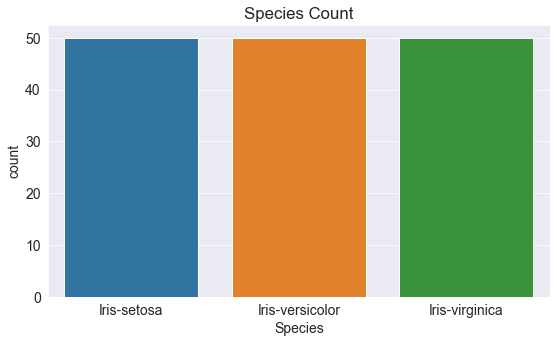

In [5]:
plt.title('Species Count')
sns.countplot(iris_data['Species'])

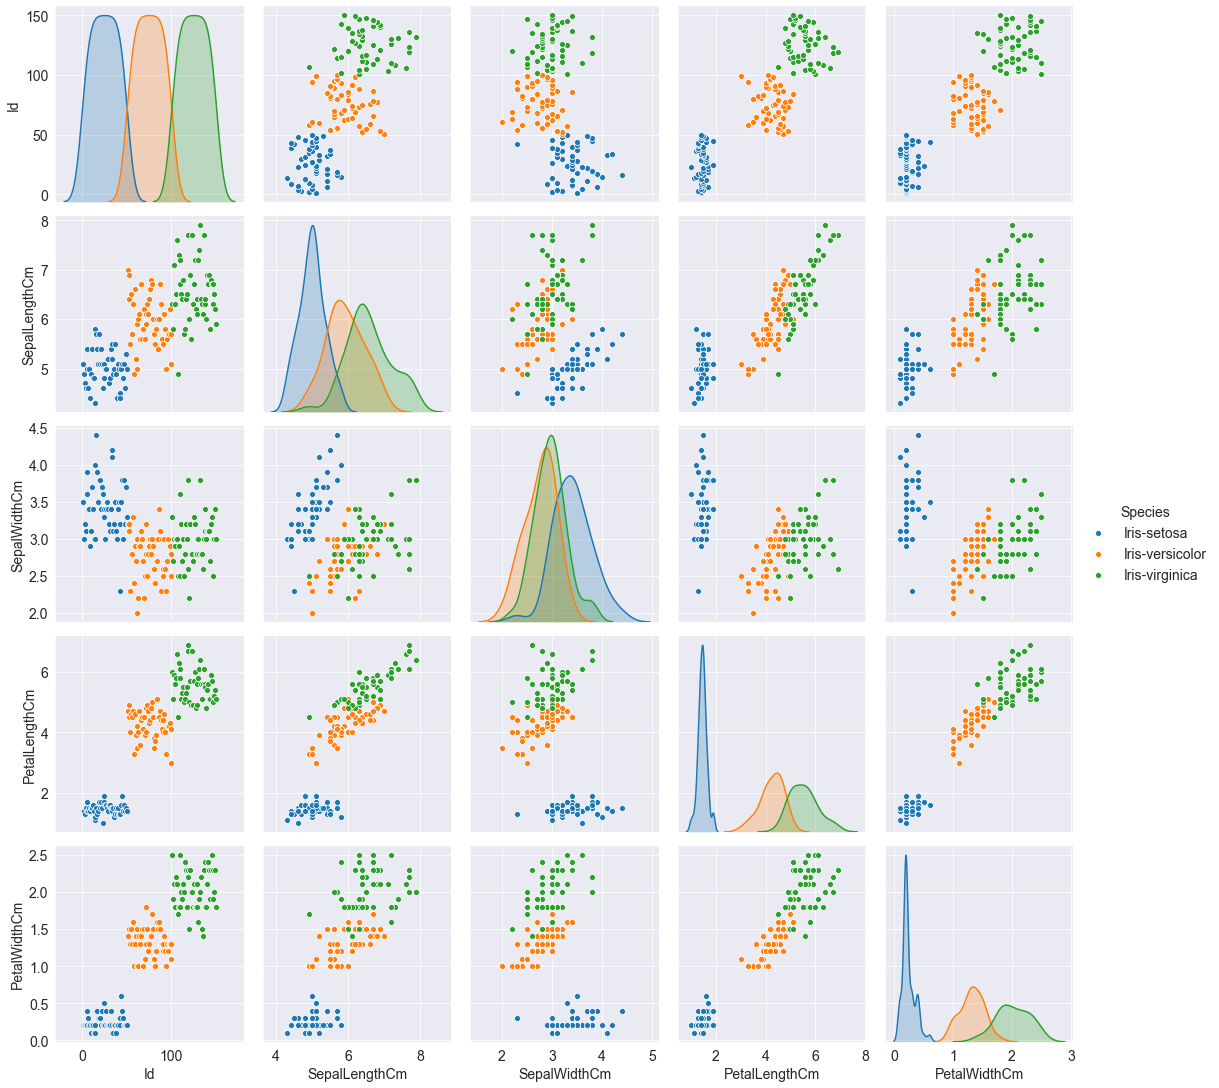

In [6]:
sns.pairplot(iris_data,hue="Species",height=3)

Pair plot represents the relationship between our target and the variables. 
We can see that the setosa species has a large difference in its characteristics when compared to the other species, 
it has smaller petal width and length while its sepal width is high and its sepal length is low. 
Similar kind of conclusions can be drawn for the other species like the Versicolor species usually have average dimensions
whether it is sepal or pedal. 
While virginica has high pedal width and length while it has small sepal width but large sepal length.

2. Get the 'features' and 'labels/target' from the data

In [7]:
x = iris.data # features
y = iris.target # labels/target

3. Split the data into training and testing data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

4. Standarized the data

In [9]:
sc = StandardScaler()
x_train_std = sc.fit_transform(X_train)
x_test_std = sc.fit_transform(X_test)

## Decision Tree 

5. Choosing Decision tree Classifier as  machine learning algorithm 

In [10]:
clf =DecisionTreeClassifier(random_state=0)

6. Train the model

In [11]:
clf.fit (x_train_std, y_train)

DecisionTreeClassifier(random_state=0)

7. Now make the prediction using Decision tree classifier

In [12]:
y_pred = clf.predict(x_test_std)

In [13]:
print("Wrong prediction out of total")
print((y_test != y_pred).sum(), '/',((y_test == y_pred).sum()+(y_test != y_pred).sum()))

Wrong prediction out of total
4 / 45


8. Metrics Evaluation

In [14]:
print('Percentage accuracy : ',100*accuracy_score(y_test, y_pred))

Percentage accuracy :  91.11111111111111


In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix  : ")
print(cm)

Confusion Matrix  : 
[[16  0  0]
 [ 0 14  4]
 [ 0  0 11]]


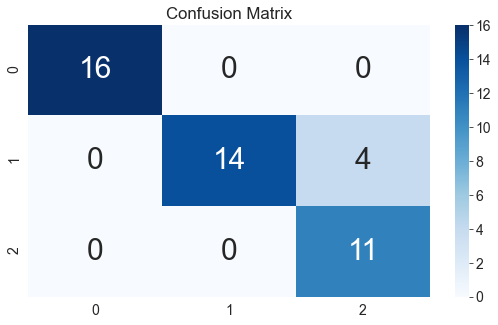

In [16]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [17]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print("Classification Report : ")
print(cr)

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.78      0.88        18
           2       0.73      1.00      0.85        11

    accuracy                           0.91        45
   macro avg       0.91      0.93      0.91        45
weighted avg       0.93      0.91      0.91        45



## Decision Tree Classifier Visualization using graphviz and dtree method

In [18]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
import graphviz

[Text(200.88000000000002, 244.62, 'X[3] <= -0.615\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(150.66000000000003, 190.26000000000002, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(251.10000000000002, 190.26000000000002, 'X[2] <= 0.624\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(100.44000000000001, 135.9, 'X[3] <= 0.544\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(50.220000000000006, 81.54000000000002, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(150.66000000000003, 81.54000000000002, 'X[1] <= 0.126\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(100.44000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(200.88000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(401.76000000000005, 135.9, 'X[3] <= 0.673\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(351.54, 81.54000000000002, 'X[3] <= 0.544\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Tex

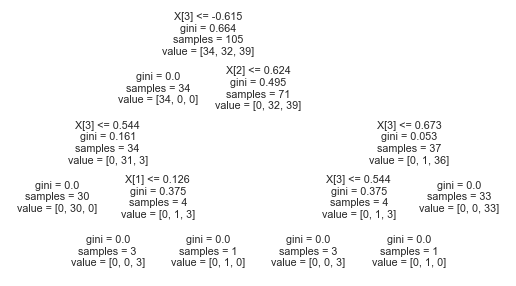

In [19]:
tree.plot_tree(clf)

In [20]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=iris.feature_names,class_names=iris.target_names,filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)

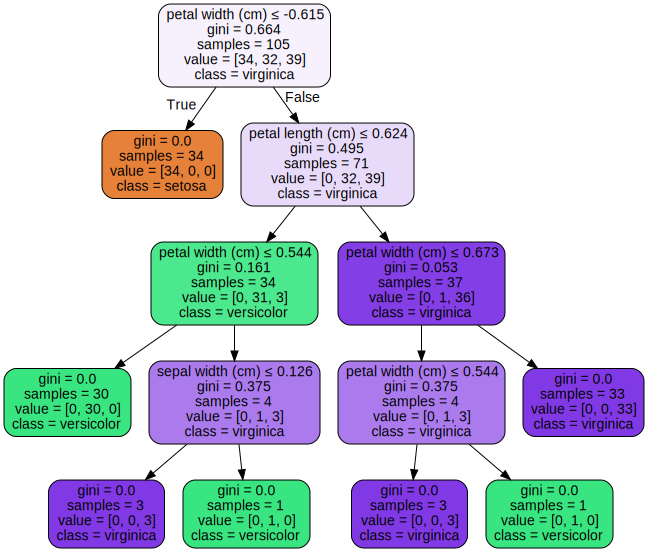

In [21]:
graph

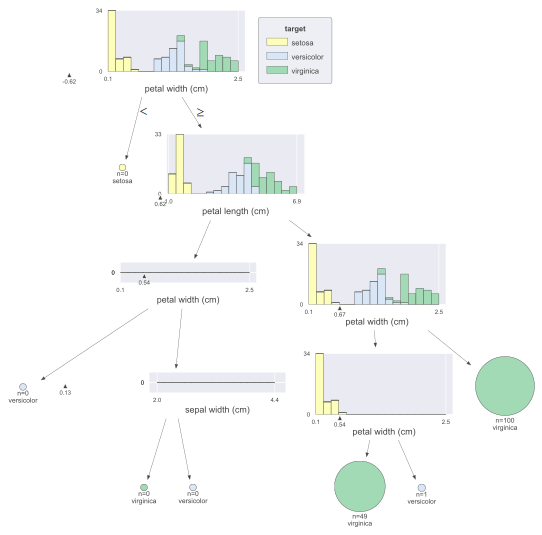

In [22]:
# !pip install dtreeviz
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(clf, x, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))

viz

## Logistic Regression

Fitting Logistic Regression to the Training set

In [23]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

Fitting the logistic regression classifier

In [24]:
lr = classifier.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train the model

In [25]:
lr.fit(x_train_std, y_train)

LogisticRegression(random_state=0)

Now make the prediction using Logistic Regression

In [26]:
y_pred = lr.predict(x_test_std)

In [27]:
print("Wrong prediction out of total")
print((y_test != y_pred).sum(), '/',((y_test == y_pred).sum()+(y_test != y_pred).sum()))

Wrong prediction out of total
2 / 45


Metrics Evaluation

In [28]:
print('Percentage accuracy : ',100*accuracy_score(y_test, y_pred))

Percentage accuracy :  95.55555555555556


In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix  : ")
print(cm)

Confusion Matrix  : 
[[16  0  0]
 [ 0 16  2]
 [ 0  0 11]]


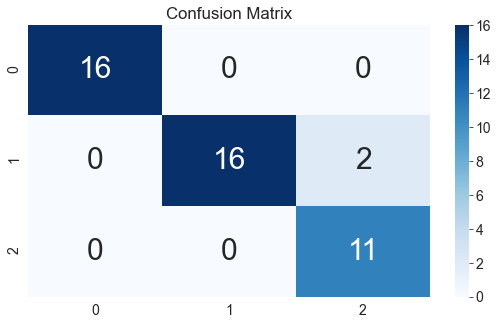

In [30]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [31]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print("Classification Report : ")
print(cr)

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.89      0.94        18
           2       0.85      1.00      0.92        11

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45

